In [73]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
df_train=pd.read_csv('blood/9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv')
df_test=pd.read_csv('blood/5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv')
Donation_made=df_train['Made Donation in March 2007']
df_total=pd.concat([df_train.drop(['Made Donation in March 2007'],axis=1), df_test])
df_total=df_total[['Months since Last Donation','Number of Donations','Months since First Donation']]
total_train=df_total.iloc[:576]
total_test=df_total.iloc[576:]
X=total_train.values
y=Donation_made.values
test=total_test.values
clf=tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)
y_pred=clf.predict_proba(test)
df_test['Made Donation in March 2007']=[i[0] for i in y_pred]
df_test[['Unnamed: 0','Made Donation in March 2007']].to_csv('blood/prediction.csv', index=False)

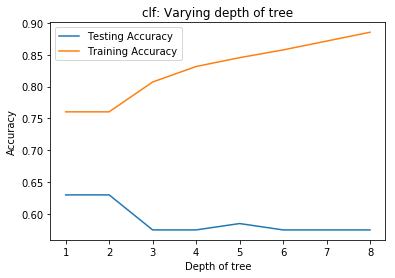

In [74]:

import matplotlib.pyplot as plt


dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()


In [72]:
df=pd.read_csv('blood/prediction.csv')
df.head()

,Unnamed: 0,Made Donation in March 2007
0,659,0.734694
1,276,0.923611
2,263,0.840000
3,303,0.680000
4,83,0.387755
